# Creating synthetic data for model prediction

### Often times for model prediction and/or model evaluation having some synthic data might be useful. In this example we will generate synthetic data with a little noise and see how it fits to a ligand binding equation.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

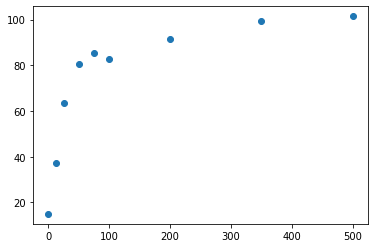

[ 14.95628543  37.33031164  63.56412325  80.6741598   85.32252989
  82.85970064  91.4578089   99.32725314 101.49347359]


In [30]:
#Ligand Binding Equation
def Ligand_Binding(x, Kd, Bmax):
    y = (Bmax*x)/(Kd+x)
    return y

x = np.array([0,12.5,25,50,75,100,200,350,500])

Kd = 25 #dissociation constant 
Bmax = 100 #receptor density

signal = Ligand_Binding(x, Kd, Bmax)
noise = 15*(np.random.ranf(9)) #adding random noise. Make the number higher to make it noiser
new_signal = signal + noise #adding signal + noise

plt.plot(x, new_signal, 'o') # plot the synthtic data using the ligand binding equation using the fitted parameters
plt.show()
print (new_signal)

### Now lets use our synthetic data with noise and fit to our ligand binding equation

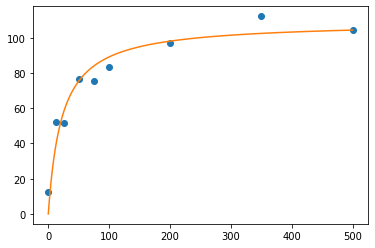

Kd is 22.3 Bmax is 109.0


In [29]:
initialParameters = np.array([5, 200]) #Kd, Bmax initial guess
fittedParameters, pcov = curve_fit(Ligand_Binding, x, new_signal, initialParameters)
Kd, Bmax = fittedParameters

x1 = np.linspace(0,500,1000) #generate points to fit the equation

yfit = Ligand_Binding(x1, Kd, Bmax) #fit model with parameters from least sq fit

plt.plot(x, new_signal, 'o') # plot the equation using the fitted parameters
plt.plot(x1, yfit) # plot the equation using the fitted parameters
plt.show()

print ("Kd is", round(Kd,1), "Bmax is", round(Bmax,1))

### Kd and Bmax was close to our parameter we assinged to generate the synthetic data